# 01-NBME-Data-Exploration

Background: https://www.kaggle.com/competitions/nbme-score-clinical-patient-notes

Objectives: 
1. identify if clinical concepts as specified in 'features' are captured for each clinical case
2. extract the texts (start_char, end_char) in clinical notes 'patient_notes' that correspond to the clinical concepts

In [42]:
# import libraries

import numpy as np
import pandas as pd
import os
from ast import literal_eval

1. Data Overview

In [2]:
df_notes = pd.read_csv('patient_notes.csv')
df_feature = pd.read_csv('features.csv')
df_train = pd.read_csv('train.csv')

In [3]:
df_notes.columns

Index(['pn_num', 'case_num', 'pn_history'], dtype='object')

In [4]:
print('unique pn_num:', df_notes['pn_num'].nunique())
print('unique case_num:', df_notes['case_num'].nunique())
print('unique pn_history:', df_notes['pn_history'].nunique())

unique pn_num: 42146
unique case_num: 10
unique pn_history: 42146


In [5]:
print('unique records per case:')
df_notes.groupby('case_num')['pn_num'].nunique()

unique records per case:


case_num
0    2268
1     808
2    1958
3    9753
4    5405
5    6909
6    1597
7    4101
8    4196
9    5151
Name: pn_num, dtype: int64

In [15]:
print('#feature_num: ', df_feature.feature_num.nunique())
print('#feature_txt: ', df_feature.feature_text.nunique()) 

#feature_num:  143
#feature_txt:  131


In [16]:
for col in df_feature.columns:
    print('---------------------------------------','\n')
    print(col, ': ')
    print(df_feature[col].value_counts())
    

--------------------------------------- 

feature_num : 
0      1
611    1
605    1
606    1
607    1
      ..
305    1
306    1
307    1
308    1
916    1
Name: feature_num, Length: 143, dtype: int64
--------------------------------------- 

case_num : 
5    18
8    18
2    17
9    17
3    16
0    13
1    13
6    12
4    10
7     9
Name: case_num, dtype: int64
--------------------------------------- 

feature_text : 
Female                                   7
Male                                     3
20-year                                  2
Nausea                                   2
35-year                                  2
                                        ..
44-year                                  1
Sleep-disturbance-OR-Early-awakenings    1
Heavy-sweating                           1
Onset-3-years-ago                        1
Subjective-fever                         1
Name: feature_text, Length: 131, dtype: int64


In [17]:
# a few feature entities (feature_text) are shared by multiple cases and take on a unique feature_num
# an example below:
df_feature[df_feature['feature_text']=='Female']

,feature_num,case_num,feature_text
25,112,1,Female
34,208,2,Female
66,407,4,Female
70,501,5,Female
99,700,7,Female
110,802,8,Female
139,913,9,Female


In [18]:
print('# of unique feature entities to be mapped out for each case: ')
df_feature.groupby(['case_num'])['feature_text'].count()

# of unique feature entities to be mapped out for each case: 


case_num
0    13
1    13
2    17
3    16
4    10
5    18
6    12
7     9
8    18
9    17
Name: feature_text, dtype: int64

2. Train data: a subset of clinical notes are provided as train data where annotation and location are given for each feature entities

In [7]:
df_train.shape

(14300, 6)

In [6]:
df_train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [14]:
df_train_w_notes = pd.merge(df_train, df_notes, how='left', left_on = ['case_num','pn_num'], right_on=['case_num','pn_num'])
df_train_w_notes.shape

(14300, 7)

In [19]:
data = pd.merge(df_train_w_notes, df_feature, how='left', left_on = ['case_num','feature_num'], right_on=['case_num','feature_num'])

data.shape

(14300, 8)

In [20]:
data.head()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],HPI: 17yo M presents with palpitations. Patien...,Family-history-of-MI-OR-Family-history-of-myoc...
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],HPI: 17yo M presents with palpitations. Patien...,Family-history-of-thyroid-disorder
2,00016_002,0,16,2,['chest pressure'],['203 217'],HPI: 17yo M presents with palpitations. Patien...,Chest-pressure
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",HPI: 17yo M presents with palpitations. Patien...,Intermittent-symptoms
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],HPI: 17yo M presents with palpitations. Patien...,Lightheaded


In [35]:
print('total # of cases in train: ', data['case_num'].nunique())
print('total # of clinical notes per case: ')

total # of cases in train:  10


In [39]:
print('# of notes for each case in train: ')
for i in data['case_num'].unique():
    print(i, ': ', data[data['case_num']==i]['pn_num'].nunique())

# of notes for each case in train: 
0 :  100
1 :  100
2 :  100
3 :  100
4 :  100
5 :  100
6 :  100
7 :  100
8 :  100
9 :  100


In [40]:
print('Feature Entities in Training Data:','\n')
print('#feature_num: ', data.feature_num.nunique())
print('#feature_txt: ', data.feature_text.nunique())    

Feature Entities in Training Data: 

#feature_num:  143
#feature_txt:  131


In [46]:
print('Features captured per case in training data:')
average_feature_captured = data[data['annot_count']!=0].groupby(['case_num','pn_num'])['feature_num'].nunique().groupby(['case_num']).mean()
total_feature_count = df_feature.groupby(['case_num'])['feature_text'].count()

pd.DataFrame({'Avg_feature_captured':average_feature_captured,
             'total_feature_count_per_case':total_feature_count,
             'Avg_percent_captured': 100*average_feature_captured/total_feature_count})


Features captured per case in training data:


,Avg_feature_captured,total_feature_count_per_case,Avg_percent_captured
case_num,,,
0,9.98,13,76.769231
1,9.42,13,72.461538
2,9.98,17,58.705882
3,11.98,16,74.875000
4,7.46,10,74.600000
5,11.74,18,65.222222
6,9.71,12,80.916667
7,6.92,9,76.888889
8,11.90,18,66.111111


In [47]:
# annotation and location for the mapped feature entities are stored as lists in the df
# each feature can have multiple sentence segments that are separated by comma
data['annot_count'] = data['annotation'].apply(lambda x: len(literal_eval(x)))
data['loc_count'] = data['location'].apply(lambda x: len(literal_eval(x)))

In [48]:
data[['annot_count', 'loc_count']].value_counts()

annot_count  loc_count
1            1            8181
0            0            4399
2            2            1296
3            3             287
4            4              99
5            5              27
6            6               9
7            7               1
8            8               1
dtype: int64

In [49]:
data[data['annot_count']!=data['loc_count']]

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text,annot_count,loc_count


In [50]:
data[data['annot_count']==0].head()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text,annot_count,loc_count
5,00016_005,0,16,5,[],[],HPI: 17yo M presents with palpitations. Patien...,No-hair-changes-OR-no-nail-changes-OR-no-tempe...,0,0
7,00016_007,0,16,7,[],[],HPI: 17yo M presents with palpitations. Patien...,Shortness-of-breath,0,0
8,00016_008,0,16,8,[],[],HPI: 17yo M presents with palpitations. Patien...,Caffeine-use,0,0
13,00041_000,0,41,0,[],[],17 Y/O M CAME TO THE CLINIC C/O HEART POUNDING...,Family-history-of-MI-OR-Family-history-of-myoc...,0,0
17,00041_004,0,41,4,[],[],17 Y/O M CAME TO THE CLINIC C/O HEART POUNDING...,Lightheaded,0,0


In [66]:
data['is_annotated']=data['annot_count'].apply(lambda x: 0 if x==0 else 1)

<AxesSubplot: >

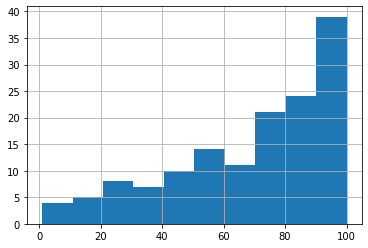

In [67]:
data.groupby(['feature_num'])['is_annotated'].agg('sum').hist()

<AxesSubplot: >

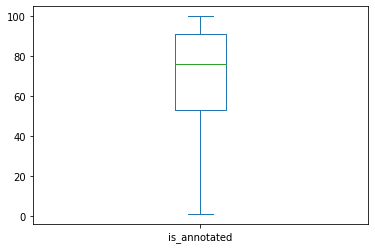

In [71]:
data.groupby(['feature_num'])['is_annotated'].agg('sum').plot.box()

In [72]:
feature_summary_train = data.groupby(['feature_num'])['is_annotated'].agg('sum')

In [78]:
feature_summary_train.describe()

count    143.000000
mean      69.237762
std       26.783419
min        1.000000
25%       53.000000
50%       76.000000
75%       91.000000
max      100.000000
Name: is_annotated, dtype: float64

In [79]:
feature_summary_train[feature_summary_train<=10]

feature_num
209    1
807    1
809    7
911    2
Name: is_annotated, dtype: int64

In [89]:
data[data['feature_num'].isin([209,807,809,911])]['case_num'].unique()

array([2, 8, 9], dtype=int64)

Features in train:
* 50% of the features are annotated in 80% of the notes
* 25% of the features are annotated in 50% of the notes
* 4 features (209, 807, 809, 911) from 3 cases are found annotated in very few notes (<10%)

In [145]:
annotation_abnormaly = data[data['location'].str.contains(';')]

In [146]:
print('# of rows with ; in annotation text: ', annotation_abnormaly.shape[0])
print('cases with this issue: ', annotation_abnormaly['case_num'].unique())
print('cases with this issue: ', annotation_abnormaly['pn_num'].nunique())

# of rows with ; in annotation text:  1650
cases with this issue:  [0 1 2 3 4 5 6 7 8 9]
cases with this issue:  737


In [147]:
annotation_abnormaly[(annotation_abnormaly['case_num']==5)].head()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text,annot_count,loc_count,annotated,is_annotated
6906,50072_506,5,50072,506,['No CP'],['426 428;437 439'],Ms. Whelan is a 26 yo F with a 6 mo hx of hear...,No-chest-pain,1,1,1,1
6907,50072_507,5,50072,507,['No drug use'],['721 723;744 752'],Ms. Whelan is a 26 yo F with a 6 mo hx of hear...,No-illicit-drug-use,1,1,1,1
6914,50072_514,5,50072,514,"['numbness of fingertips', 'numbness of hands']","['357 379', '357 368;388 393']",Ms. Whelan is a 26 yo F with a 6 mo hx of hear...,Episode-of-hand-numbness-OR-Episode-of-finger-...,2,2,1,1
6922,50199_504,5,50199,504,"['palpitations', 'heart racing']","['65 77', '107 112;129 135']",Ms. Whelan is a 26y/o F presenting to f/u from...,Episodes-of-heart-racing,2,2,1,1
6943,50375_507,5,50375,507,['Denies durg use'],['773 779;798 806'],Edie Whelan is a 26 year old female who presen...,No-illicit-drug-use,1,1,1,1


In [148]:
pn_50072 = annotation_abnormaly[(annotation_abnormaly['case_num']==5) & (annotation_abnormaly['pn_num']==50072)].iloc[0].pn_history
pn_50072

'Ms. Whelan is a 26 yo F with a 6 mo hx of heart palpitations that have been increasing in freq in the past 2 weeks. She was seen 2 weeks ago for similar symptoms with a w/u WNL. \r\n-The events last 12-30 min, are not assoc with anything particular, no alleviating or aggrevating factors. \r\n-She has assoc SOB, hot and then cold and clamy skin\r\n-Recently had numbness of fingertips on both hands during palpitation event \r\nROS: No dyspne, CP, skin, hair or wt changes. \r\nPMH: none\r\nPSH: None \r\nMeds: none \r\nAllergies: NKD\r\nFH: non contributory \r\nSH: 2 months unemployed, recently purchased a condo but is optomistic about her financial and occupational situation. Lives alone, sexual active with one partner, uses condoms. No alcohol, tobacco or drug use.'

In [149]:
list(pn_50072)[426:439]

['N', 'o', ' ', 'd', 'y', 's', 'p', 'n', 'e', ',', ' ', 'C', 'P']

Annotations: 
1. There are 4399 records where no annotated texts are found; most of time feature_text is represented by a single text segment marked by a single pair of 'start end' indices, but can also be described by separate text segments. 
2. Number of annotations for each matches the number of location (start, end) 
3. Case_num 2 and 9 have the lowest numbers of features captured (below 60%)
4. 1650 records contain ; in location column and requires further cleaning

In [65]:
#visualize the annotation
#length of the annotation

In [91]:
data.to_csv('data.csv', index=False)